In [3]:
import csv
import numpy as np
import pandas as pd 
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
titanic_data=pd.read_csv("titanic_train.csv",delimiter=",")
print("the shape of the data : ",titanic_data.shape)
titanic_data.head()

the shape of the data :  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.info()
#from here we can see which columns are null 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#check the number of missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#handling the features 

# Impute missing values
# 1. Fill missing values in 'Age' with the median (numerical column)
age_imputer = SimpleImputer(strategy='median')
titanic_data['Age'] = age_imputer.fit_transform(titanic_data[['Age']])

# 2. Fill missing values in 'Embarked' with the mode (categorical column)
embarked_imputer = SimpleImputer(strategy='most_frequent')
titanic_data['Embarked'] = embarked_imputer.fit_transform(titanic_data[['Embarked']]).ravel()

# 3. Drop the 'Cabin' column as it has too many missing values
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

print("\nMissing values after imputation:")
print(titanic_data.isnull().sum())


Missing values after imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [8]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

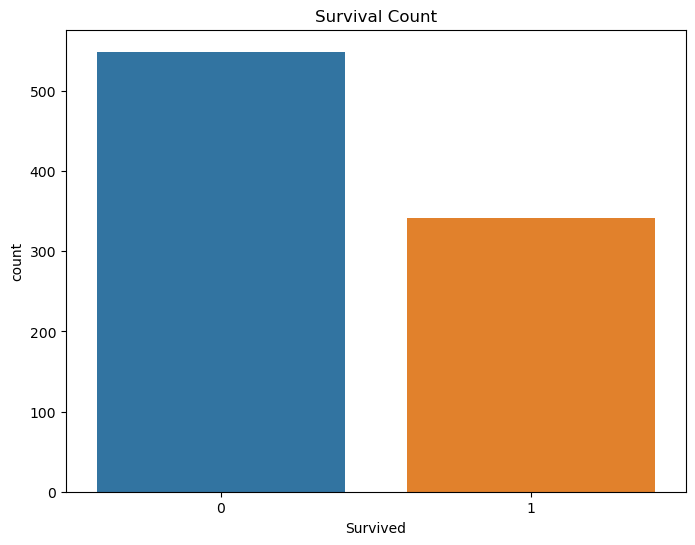

In [11]:
# **Plot 1: Count plot for "Survived" column**
plt.figure(figsize=(8,6))  # Create a new figure for each plot
sns.countplot(x='Survived', data=titanic_data)
plt.title("Survival Count")
plt.show()

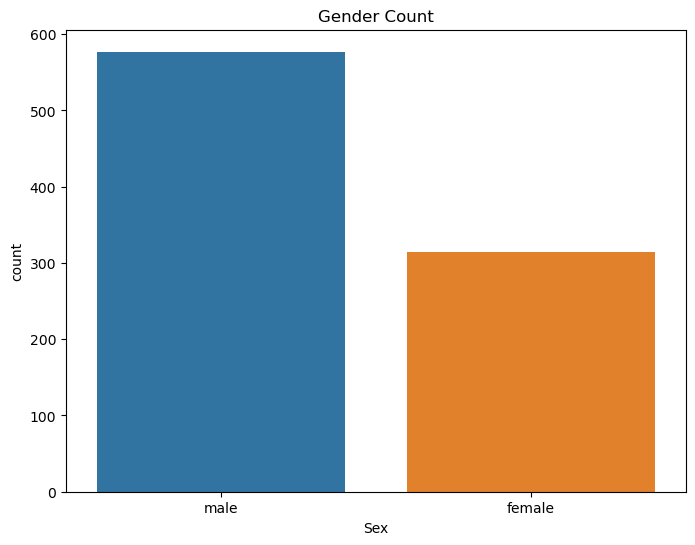

In [12]:
# Plot 2: Count plot for "Sex" column
plt.figure(figsize=(8,6))  # Create a new figure
sns.countplot(x='Sex', data=titanic_data)
plt.title("Gender Count")
plt.show()

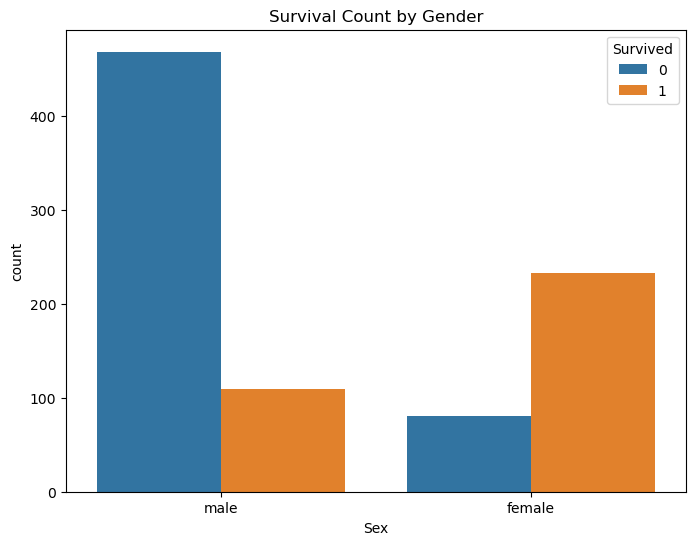

In [13]:
# **Plot 3: Number of survivors, gender-wise**
# Convert 'Survived' to string to fix the error with legend handling
titanic_data['Survived'] = titanic_data['Survived'].astype(str)

plt.figure(figsize=(8,6))  # Create a new figure
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.title("Survival Count by Gender")
plt.show()


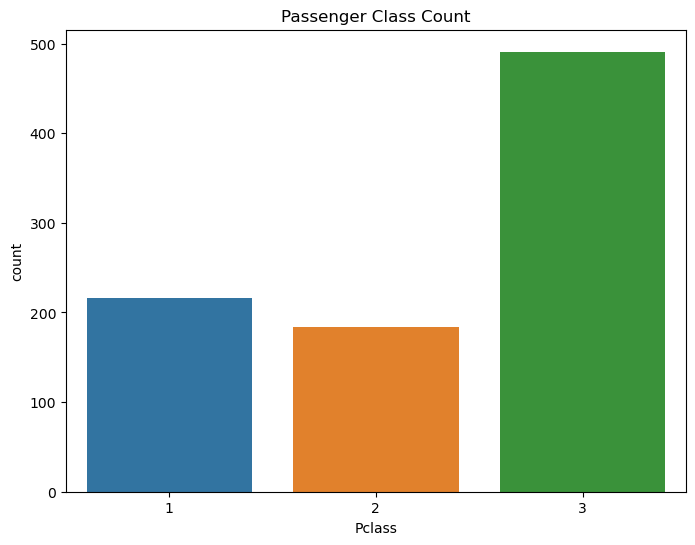

In [14]:
# Plot for "Pclass" column
plt.figure(figsize=(8,6))  # Create a new figure for each plot
sns.countplot(x='Pclass', data=titanic_data)
plt.title("Passenger Class Count")
plt.show()


<Axes: xlabel='Pclass', ylabel='count'>

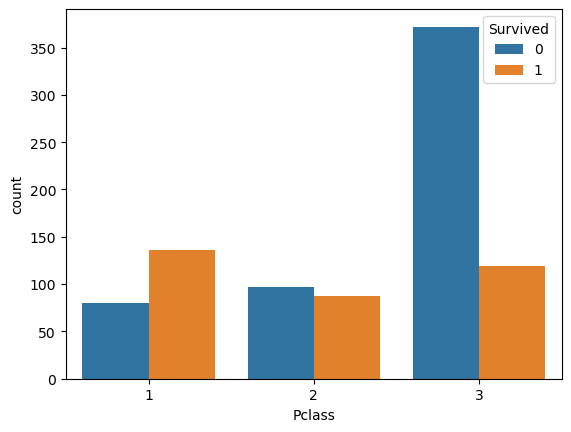

In [15]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
# Higher-class passengers (Pclass 1 and 2) were more likely to survive compared to those in third class (Pclass 3), 
#   due to factors like proximity to lifeboats, access to better resources, and other socio-economic influences.

In [16]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [17]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [18]:
# converting categorical Columns

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [19]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [20]:
#seperating features and target
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']
print(X)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    0  22.0      1      0   7.2500         0
1         1    1  38.0      1      0  71.2833         1
2         3    1  26.0      0      0   7.9250         0
3         1    1  35.0      1      0  53.1000         0
4         3    0  35.0      0      0   8.0500         0
..      ...  ...   ...    ...    ...      ...       ...
886       2    0  27.0      0      0  13.0000         0
887       1    1  19.0      0      0  30.0000         0
888       3    1  28.0      1      2  23.4500         0
889       1    0  26.0      0      0  30.0000         1
890       3    0  32.0      0      0   7.7500         2

[891 rows x 7 columns]


In [21]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: object


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [24]:
model = LogisticRegression()

In [25]:
# training the Logistic Regression model with training data
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit the model with scaled data
model = LogisticRegression(max_iter=200) 
model.fit(X_train_scaled, Y_train)


LogisticRegression(max_iter=200)

In [26]:
# accuracy on training data
X_train_prediction = model.predict(X_train_scaled)
print(X_train_prediction)

['0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0'
 '0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '1' '0' '0' '1' '0' '0' '1' '0'
 '1' '0' '1' '0' '0' '0' '0' '1' '1' '0' '0' '1' '0' '1' '0' '1' '0' '0'
 '0' '0' '0' '0' '1' '0' '1' '0' '0' '1' '1' '0' '0' '1' '1' '0' '1' '0'
 '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0'
 '1' '0' '0' '1' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '0' '0' '1'
 '0' '0' '0' '1' '1' '0' '0' '1' '0' '0' '1' '0' '0' '1' '0' '0' '1' '0'
 '1' '0' '1' '0' '1' '0' '1' '1' '1' '1' '1' '1' '0' '0' '1' '1' '1' '0'
 '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '0'
 '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '1' '0'
 '1' '0' '1' '1' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '1' '0' '0'
 '0' '1' '1' '0' '1' '0' '0' '0' '0' '0' '1' '1' '0' '1' '1' '1' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '1' '0' '0' '1' '0' '1'
 '1' '1' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0

In [27]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8103932584269663


In [28]:
# Scale the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Make predictions
X_test_prediction = model.predict(X_test_scaled)


In [29]:
print(X_test_prediction)

['0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '1' '0' '0'
 '1' '0' '1' '1' '0' '1' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '1'
 '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '1' '0' '0' '0' '0'
 '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '0' '1' '0'
 '1' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '0' '1' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '1' '0' '1' '1' '0' '1' '1' '1'
 '0' '0' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0'
 '0' '1' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1'
 '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '1' '0'
 '0' '0' '1' '1' '0' '0' '1' '0' '0' '1' '1' '1' '0' '0' '0' '0' '0']


In [30]:
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data : ', testing_data_accuracy)

Accuracy score of testing data :  0.7877094972067039


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters found:  {'fit_intercept': True, 'max_iter': 100, 'solver': 'liblinear'}
Logistic Regression Training Accuracy: 0.8117977528089888
Logistic Regression Testing Accuracy: 0.7877094972067039
Logistic Regression Cross-validation scores: [0.83216783 0.7972028  0.81690141 0.8028169  0.78873239]
Mean cross-validation score: 0.8075642667191962


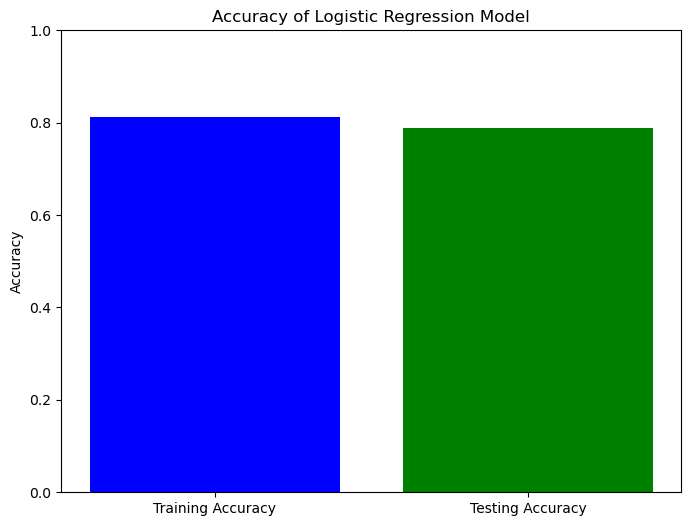

In [34]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the grid of hyperparameters
param_grid = {
    'solver': ['liblinear', 'saga'],  # used to optimize the model's parameters
    'max_iter': [100, 200, 300],  # Number of iterations for convergence
    'fit_intercept': [True, False]  # Whether to include intercept
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=log_reg, 
                           param_grid=param_grid, 
                           cv=5,          # Cross-validation
                           n_jobs=-1,     # Use all available processors speed up the grid search,
                           verbose=1)     # Show progress speed up the grid search,

# Fit the model with the training data
grid_search.fit(X_train_scaled, Y_train)

# Get the best hyperparameters found by GridSearchCV
print("Best Hyperparameters found: ", grid_search.best_params_)

# Get the best estimator (model with optimal hyperparameters)
best_log_reg = grid_search.best_estimator_


train_prediction = best_log_reg.predict(X_train_scaled)
train_accuracy = accuracy_score(Y_train, train_prediction)
print(f'Logistic Regression Training Accuracy: {train_accuracy}')

test_prediction = best_log_reg.predict(X_test_scaled)
test_accuracy = accuracy_score(Y_test, test_prediction)
print(f'Logistic Regression Testing Accuracy: {test_accuracy}')

# Perform cross-validation with Logistic Regression
cv_scores_lr = cross_val_score(best_log_reg, X_train_scaled, Y_train, cv=5)
print(f"Logistic Regression Cross-validation scores: {cv_scores_lr}")
print(f"Mean cross-validation score: {cv_scores_lr.mean()}")

accuracy_values = [train_accuracy, test_accuracy]
accuracy_labels = ['Training Accuracy', 'Testing Accuracy']

plt.figure(figsize=(8, 6))
plt.bar(accuracy_labels, accuracy_values, color=['blue', 'green'])
plt.title('Accuracy of Logistic Regression Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
plt.show()


Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Training Accuracy: 0.9087078651685393
Random Forest Testing Accuracy: 0.7932960893854749


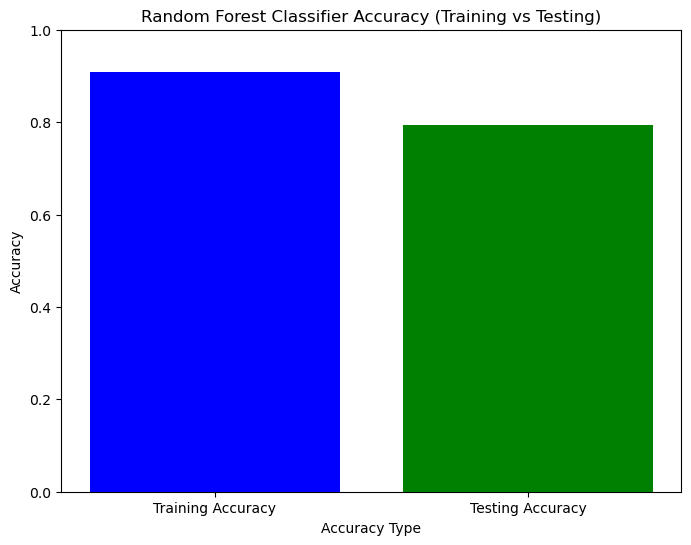

In [38]:

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20],     
    'min_samples_split': [2, 10, 20], 
    'min_samples_leaf': [1, 2, 5]     
}b 

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, Y_train)

print("Best Hyperparameters: ", grid_search.best_params_)

# Train the Random Forest model with the best hyperparameters
rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rf_model.fit(X_train_scaled, Y_train)

# Evaluate Random Forest on training data
rf_train_prediction = rf_model.predict(X_train_scaled)
rf_train_accuracy = accuracy_score(Y_train, rf_train_prediction)
print(f'Random Forest Training Accuracy: {rf_train_accuracy}')

# Evaluate Random Forest on testing data
rf_test_prediction = rf_model.predict(X_test_scaled)
rf_test_accuracy = accuracy_score(Y_test, rf_test_prediction)
print(f'Random Forest Testing Accuracy: {rf_test_accuracy}')

accuracy_scores = [rf_train_accuracy, rf_test_accuracy]
labels = ['Training Accuracy', 'Testing Accuracy']

plt.figure(figsize=(8,6))
plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.title('Random Forest Classifier Accuracy (Training vs Testing)')
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
plt.show()




SVM Training Accuracy: 0.800561797752809
SVM Testing Accuracy: 0.7597765363128491


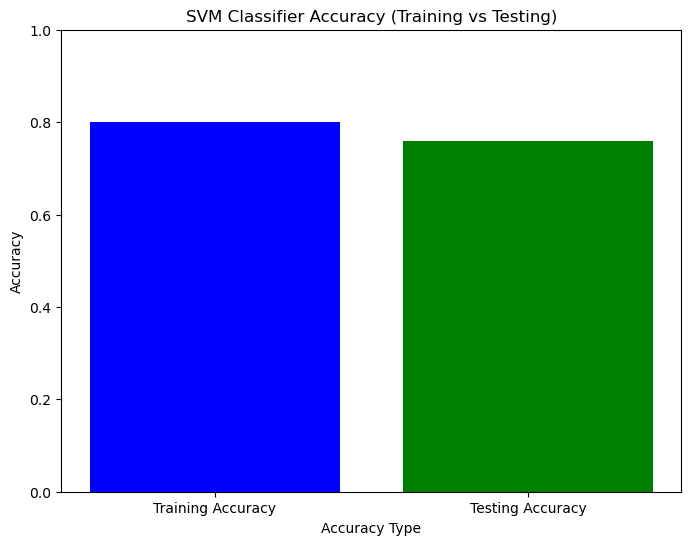

In [41]:
from sklearn.svm import SVC

# SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, Y_train)

# Evaluate SVM on training data
svm_train_prediction = svm_model.predict(X_train_scaled)
svm_train_accuracy = accuracy_score(Y_train, svm_train_prediction)
print(f'SVM Training Accuracy: {svm_train_accuracy}')

# Evaluate SVM on testing data
svm_test_prediction = svm_model.predict(X_test_scaled)
svm_test_accuracy = accuracy_score(Y_test, svm_test_prediction)
print(f'SVM Testing Accuracy: {svm_test_accuracy}')

accuracy_scores_svm = [svm_train_accuracy, svm_test_accuracy]
labels_svm = ['Training Accuracy', 'Testing Accuracy']

plt.figure(figsize=(8,6))
plt.bar(labels_svm, accuracy_scores_svm, color=['blue', 'green'])
plt.title('SVM Classifier Accuracy (Training vs Testing)')
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
plt.show()


In [43]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(Y_test, X_test_prediction)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[91  9]
 [29 50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       100
           1       0.85      0.63      0.72        79

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.78       179



In [47]:
models = [
    ("Logistic Regression", best_log_reg, train_accuracy, test_accuracy),
    ("Random Forest", rf_model, rf_train_accuracy, rf_test_accuracy),
    ("SVM", svm_model, svm_train_accuracy, svm_test_accuracy)
]

best_model = None
best_accuracy = 0
smallest_gap = float('inf')

for name, model, train_acc, test_acc in models:
    gap = abs(train_acc - test_acc)
    if test_acc > best_accuracy or (test_acc == best_accuracy and gap < smallest_gap):
        best_accuracy = test_acc
        best_model = model
        smallest_gap = gap

def predict_survival():
    pclass = int(input("Enter Passenger Class (1, 2, or 3): "))
    sex = input("Enter Sex (male or female): ").strip().lower()
    age = float(input("Enter Age: "))
    sibsp = int(input("Enter Number of Siblings/Spouses Aboard: "))
    parch = int(input("Enter Number of Parents/Children Aboard: "))
    fare = float(input("Enter Fare: "))
    embarked = input("Enter Embarked Port (S, C, or Q): ").strip().upper()
    
   
    sex = 0 if sex == "male" else 1
    embarked = {'S': 0, 'C': 1, 'Q': 2}.get(embarked, -1)  
    
    input_data = pd.DataFrame({
        'Pclass': [pclass],
        'Sex': [sex],
        'Age': [age],
        'SibSp': [sibsp],
        'Parch': [parch],
        'Fare': [fare],
        'Embarked': [embarked]
    })
    
    age_imputer = SimpleImputer(strategy='median')
    embarked_imputer = SimpleImputer(strategy='most_frequent')
    
    input_data['Age'] = age_imputer.fit_transform(input_data[['Age']])
    input_data['Embarked'] = embarked_imputer.fit_transform(input_data[['Embarked']]).ravel()

    input_data_scaled = scaler.transform(input_data)

    survival_prediction = best_model.predict(input_data_scaled)
    
    if survival_prediction == 1:
        print("The passenger is predicted to survive.")
    else:
        print("The passenger is predicted not to survive.")

predict_survival()


Enter Passenger Class (1, 2, or 3):  1
Enter Sex (male or female):  female
Enter Age:  29
Enter Number of Siblings/Spouses Aboard:  1
Enter Number of Parents/Children Aboard:  0
Enter Fare:  50
Enter Embarked Port (S, C, or Q):  c


The passenger is predicted not to survive.
